In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [2]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


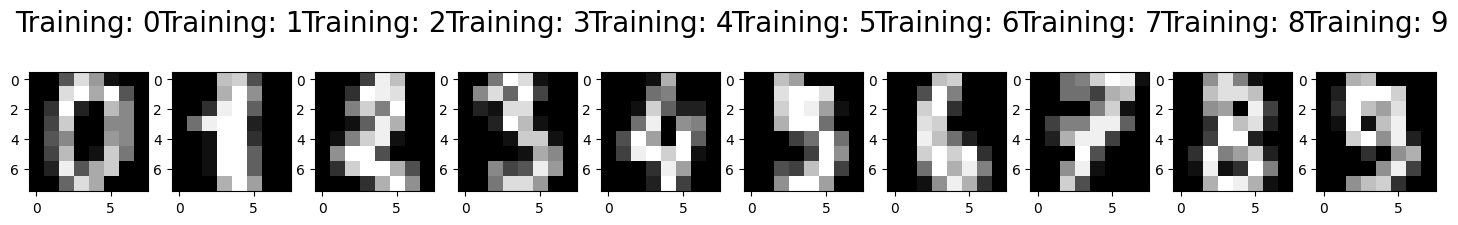

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
  plt.subplot(1,11,index+1)
  plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' %label, fontsize=20)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=2)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)


(1257, 64)
(1257,)
(540, 64)
(540, 64)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [15]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print(lr.predict(x_test[0].reshape(1,-1)))

[4]


In [18]:
lr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [17]:

predictions = lr.predict(x_test)
score= lr.score(x_test, y_test)
print

0.9537037037037037


In [20]:
cm=metrics.confusion_matrix(y_test, predictions)
print(cm)

[[53  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  3  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 58  0  2  0  1  1  0]
 [ 0  0  0  0 49  0  0  0  2  2]
 [ 0  0  0  0  1 56  0  0  0  2]
 [ 0  1  0  0  0  0 54  0  1  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  3  0  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  2 40]]


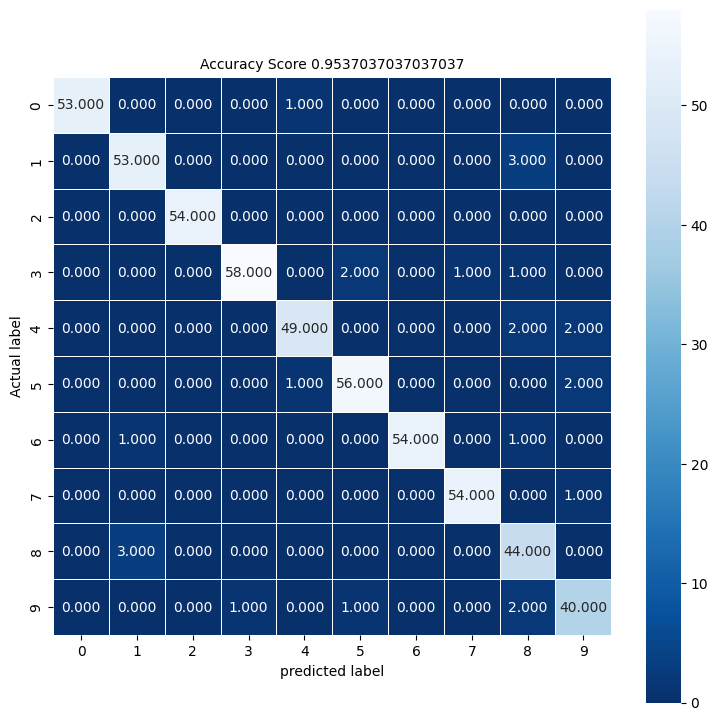

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('predicted label');
all_sample_title = 'Accuracy Score {0}'.format(score)
plt.title(all_sample_title,size=10);

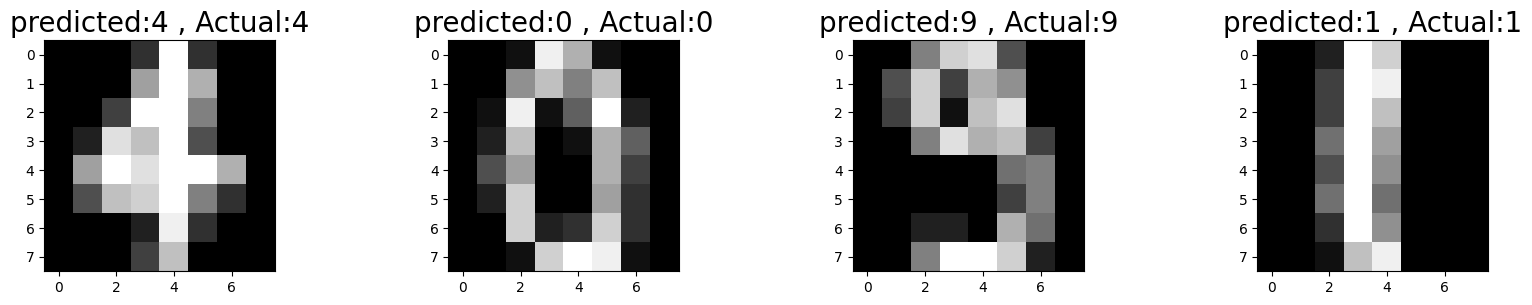

In [26]:

index=0
classifiedIndex=[]
for predict,actual in zip(predictions, y_test):
  if predict==actual:
    classifiedIndex.append(index)
  index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4,plotIndex+1)
  plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
  plt.title("predicted:{} , Actual:{}".format(predictions[wrong],y_test[wrong]), fontsize=20)
